## TD Lambda

In [4]:
# Imports
from __future__ import print_function
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.collections import LineCollection
from matplotlib import cm
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys

module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from parameters import *

In [43]:
import TD0_model

In [44]:
first_visit_model = TD0_model.TD0FirstVisit('./TDFirstVisit_stan/')

In [45]:
first_visit_model.get_trajectory_data()

Trajectory Data written to /Users/usingla/mouse-maze/MouseMaze/TDFirstVisit_stan/pre_reward_traj/real_trajrewMICE_first_visit.p


In [46]:
sub_fits = {i: [0.1, 2, 0.9, -1] for i in range(0, 10)}
sub_fits

{0: [0.1, 2, 0.9, -1],
 1: [0.1, 2, 0.9, -1],
 2: [0.1, 2, 0.9, -1],
 3: [0.1, 2, 0.9, -1],
 4: [0.1, 2, 0.9, -1],
 5: [0.1, 2, 0.9, -1],
 6: [0.1, 2, 0.9, -1],
 7: [0.1, 2, 0.9, -1],
 8: [0.1, 2, 0.9, -1],
 9: [0.1, 2, 0.9, -1]}

In [47]:
orig_data = '/Users/usingla/mouse-maze/MouseMaze/TDFirstVisit_stan/pre_reward_traj/real_trajrewMICE_first_visit.p'

In [93]:
output = first_visit_model.simulate(sub_fits, orig_data)
state_hist_all = output[0]

In [100]:
for i in output[0]:
    print("mouse Id:", i)
    for j in output[0][i]:
        print(" ==> len of trajectory: ", len(output[0][i][j]))

mouse Id: 0
 ==> len of trajectory:  18
 ==> len of trajectory:  94
 ==> len of trajectory:  274
 ==> len of trajectory:  276
 ==> len of trajectory:  193
mouse Id: 1
 ==> len of trajectory:  11
mouse Id: 2
 ==> len of trajectory:  13
mouse Id: 3
 ==> len of trajectory:  319
mouse Id: 4
 ==> len of trajectory:  57
mouse Id: 5
 ==> len of trajectory:  32
 ==> len of trajectory:  39
mouse Id: 6
 ==> len of trajectory:  206
 ==> len of trajectory:  1299
mouse Id: 7
 ==> len of trajectory:  241
mouse Id: 8
 ==> len of trajectory:  25
mouse Id: 9
 ==> len of trajectory:  86
 ==> len of trajectory:  192
 ==> len of trajectory:  67


In [112]:
from model_plot_utils import plot_trajectory

In [113]:
state_hist_all[1][0]

[0, 2, 6, 14, 6, 13, 28, 57, 115, 57, 116]

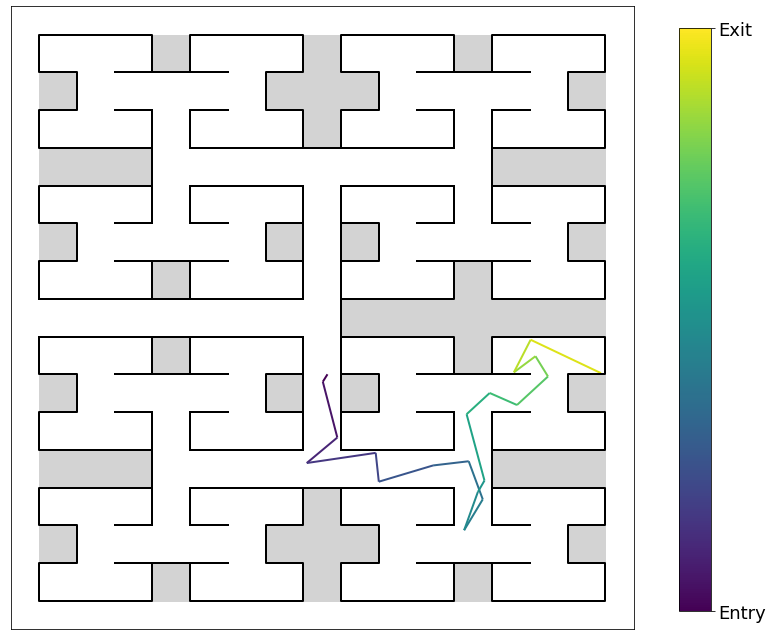

In [116]:
plot_trajectory({1: state_hist_all[1][0]}, 'all')

In [ ]:
# # WIP: TDLambdaXStepsRewardReceived model

# trajectory_data = TDLambdaXStepsRewardReceived('./TDlambdaXsteps_stan/').get_trajectory_data()
# [len(i) for i in trajectory_data]
# sa_node_map = TDLambdaXStepsRewardReceived('./TDlambdaXsteps_stan/').get_SAnodemap()

# # output number of trajectories [74, 115, 50, 133, 133, 143, 112, 115, 123, 138] = 1136

In [ ]:
# Plotting results from running TD(0) model above

# Plotting state values
fig, ax = plt.subplots(figsize=(30,800))
axhandle = ax.imshow(np.transpose(np.reshape(avg_V,(S+1,1))),cmap='YlGnBu')
ax.invert_yaxis()
ax.set_ylabel('V (s)')
ax.set_xticks(np.arange(0,127,5))
ax.set_xticklabels([str(val) for val in np.arange(0,127,5)])
ax.set_xlabel('Nodes')
ax.set_title('Average state values for TD(0) with alpha: %.2f, beta: %.2f and gamma: %.2f' % (alpha,beta,gamma))
fig.colorbar(axhandle,fraction=0.005)

print('Max state value ', np.max(avg_V))
print('Min state value', np.min(avg_V))

# Set trajectories for plotting
print('Total reward: ', total_reward)
print('alpha: ', alpha, ' beta: ', beta, ' gamma: ', gamma)
plot_trajectory(state_hist_all, 'all')

## Simulating Fake Data to test Parameter Recovery for a Model

In [ ]:
# Look into paramater_recovery_utils.py

## Evaluating Model Fit with Real data

In [ ]:
# Look into evaluating_models.py

In [ ]:
# Save plots generated from model fit results for each mouse

save_dir = 'C:/Users/kdilh/Documents/GitHub/MouseMaze/figures/TD0_firstreward/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for mouseID, nickname in enumerate(RewNames):
    state_hist_cell, state_hist_xy = nodes2cell(state_hist_AllMice[mouseID])
    figtitle = 'Simulated trajectory for '+nickname+' with '+str(valid_bouts[mouseID]) \
    +' valid bouts \n '+\
    ' alpha: '+str(np.round(best_sub_fits[mouseID][0],2))+\
    ' beta: '+str(np.round(best_sub_fits[mouseID][1],2))+\
    ' gamma: '+str(np.round(best_sub_fits[mouseID][2],2)) + ', subject LL - random LL: ' + str(np.round(best_sub_fits[mouseID][3] - rand_LL[mouseID],2))
    plot_trajectory('all', save_dir, nickname, figtitle)  # enter a single episode ID or enter 'all'
